OPTIMAL SOLUTION:
X: 2000.0
Y: 1500.0
Z: 1500.0
Minimum cost: 490.0


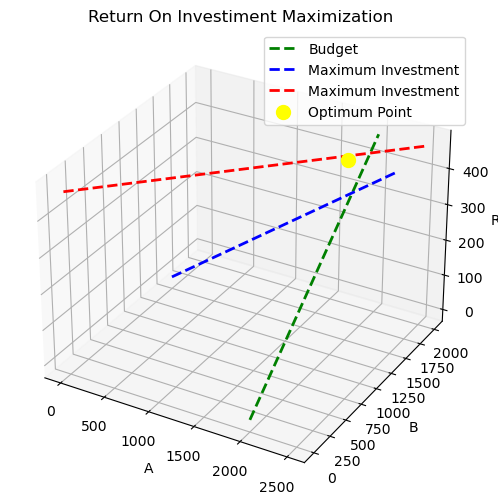

In [1]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pulp import LpVariable, LpMaximize, LpProblem

#the problem
problem = LpProblem(name="Financial_portfolio_optimization", sense=LpMaximize)

#decision variables
x1 = LpVariable(name="x", lowBound=0)
x2 = LpVariable(name="y", lowBound=0)
x3 = LpVariable(name="z", lowBound=0)

# Define the objective function coefficients
problem += 0.08*x1 + 0.1*x2 + 0.12*x3, "objective"

# Coefficients of the inequality constraints
problem += 2*x1 + 3*x2 + x3 <= 10000, "budget"
problem += x1 >= 2000
problem += x2 >= 1500
problem += x3 >= 1000


# Solve linear programming problem
problem.solve()

# Display the results
print("OPTIMAL SOLUTION:")
print(f"X: {x1.varValue}")
print(f"Y: {x2.varValue}")
print(f"Z: {x3.varValue}")
print(f"Minimum cost: {problem.objective.value()}")


# Create a meshgrid for A, B, and C
A_vals = np.linspace(0, 2500, 50)
B_vals = np.linspace(0, 2000, 50)
A_grid, B_grid = np.meshgrid(A_vals, B_vals)

# Calculate the corresponding z-values (ROI function)
C_vals = (10000 - 2 * A_grid - 3 * B_grid)  # Budget constraint
ROI_vals = 0.08 * A_grid + 0.1 * B_grid + 0.12 * C_vals

# Create the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the feasible region (constraints)
ax.plot([2000, 2000], [0, 2000], [0, 470], color='green', linestyle='--', linewidth=2, label='Budget')
ax.plot([0, 2500], [1500, 1500], [0, 470], color='blue', linestyle='--', linewidth=2, label='Maximum Investment')
ax.plot([0, 2500], [0, 2000], [470, 470], color='red', linestyle='--', linewidth=2, label='Maximum Investment')

# Highlight the optimum point
optimum_A = 2000
optimum_B = 1500
optimum_ROI = 470
ax.scatter(optimum_A, optimum_B, optimum_ROI, color='yellow', s=100, label='Optimum Point')

# Set labels and title
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('ROI')
ax.set_title('Return On Investiment Maximization')

# Add a legend
ax.legend()

# Show the plot
plt.show()